HIV model

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [9]:
def make_system(gamma, tau, mu, beta, rho, alpha, delta, pi, sigma, dt):
    """Make a system object for the HIV model.
    
    Each parameter is found in the HIV model worksheet.
    returns: System object
    """
    init = State(R=200, L=0, E=0, V=4e-7)

    t0 = 0
    t_end = 120*1/(dt)

    return System(init=init, t0=t0, t_end=t_end,
                  gamma=gamma, tau=tau, mu=mu, 
                  beta=beta, rho=rho, alpha=alpha, 
                  delta=delta, pi=pi, sigma=sigma, dt=dt)

In [3]:
def update_func(state, t, system):
    """Update the HIV model.
    
    state: State (R, L, E, V)
    t: time
    system: System object
    
    returns: State
    """
    r, l, e, v = state
    
    cells_in = system.gamma*system.tau
    regular_cell_death = system.mu*r
    latent_infection=system.beta*system.rho*r*v
    active_infection=system.beta*(1-system.rho)*r*v
    latent_death=system.mu*l
    activation_of_latent=system.alpha*l
    active_death=system.delta*e
    virion_in=system.pi*e
    virion_out=system.sigma*v
    
    r += (cells_in - regular_cell_death - latent_infection - active_infection)*system.dt
    l += (latent_infection - latent_death - activation_of_latent)*system.dt
    e += (active_infection + activation_of_latent - active_death)*system.dt
    v += (virion_in - virion_out)*system.dt
    
    return State(R=r, L=l, E=e, V=v)

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame


In [5]:
#gamma, tau, mu, beta, rho, alpha, delta, pi, sigma, dt
system = make_system(1.36, 0.2, 0.00136, 0.00027, 0.1, 0.036, 0.33, 100, 2, 0.25)
run_simulation(system, update_func)

,R,L,E,V
0,200.000000,0.000000e+00,0.000000e+00,4.000000e-07
1,200.000000,5.400000e-10,4.860000e-09,2.000000e-07
2,200.000000,8.049564e-10,6.893910e-09,2.215000e-07
3,200.000000,1.096463e-09,9.023632e-09,2.830977e-07
4,200.000000,1.468404e-09,1.172869e-08,3.671397e-07
5,200.000000,1.950328e-09,1.523503e-08,4.767870e-07
6,200.000000,2.575774e-09,1.978866e-08,6.192694e-07
7,200.000000,3.387730e-09,2.570340e-08,8.043512e-07
8,200.000000,4.441963e-09,3.338623e-08,1.044761e-06
9,200.000000,5.810902e-09,4.336568e-08,1.357036e-06


In [6]:
def plot_results(R, L, E, V):
    plot(R, label='R')
    plot(L, label='L')
    plot(E, label='E')
    decorate(xlabel = 'number of 6hour increments (days x 1/dt)',
            ylabel = 'number of cells',
            title = 'Number of Cells Over Time')

def plot_other_results(R, L, E, V):
    plot(V, label = 'V')
    plot(L+R+E, label = 'cells (R+L+E)')
    decorate(xlabel = 'number of 6hour increments (days*1/dt)',
            ylabel = 'number',
            title = 'Virions and Total Cells')

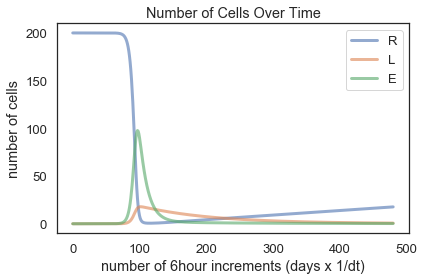

In [7]:
system = make_system(1.36, 0.2, 0.00136, 0.00027, 0.1, 0.036, 0.33, 100, 2, 0.25)
results=run_simulation(system, update_func)
plot_results(results.R, results.L, results.E, results.V)

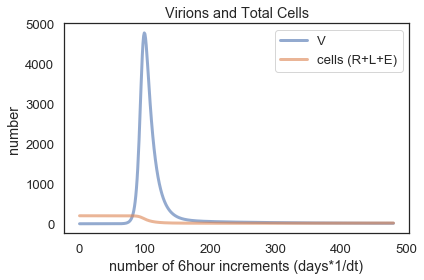

In [8]:
plot_other_results(results.R, results.L, results.E, results.V)